# Importando base de dados 

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('data/tips.csv')
dados.head()


,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [3]:
dados.columns = ['valor_conta', 'gorjeta', 'sobremesa', 'dia_semana','hora_dia','qtd_pessoas']
dados

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,qtd_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [4]:
#Tipo dos dados
type(dados)

pandas.core.frame.DataFrame

In [5]:
# Tamanho da base de dados
dados.shape

(244, 6)

In [6]:
dados.head(1)

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,qtd_pessoas
0,16.99,1.01,No,Sun,Dinner,2


# Renomeando valores das colunas


In [7]:

s_n = {'No': 'Não', 'Yes':'Sim'}

dados.sobremesa = dados.sobremesa.map(s_n)

In [8]:
dados.sobremesa.unique()

array(['Não', 'Sim'], dtype=object)

In [9]:
dados.dia_semana.unique()

dia_semana = {'Sun':'Domingo', 'Sat':'Sabado', 'Thur':'Quinta', 'Fri':'Sexta'}

dados.dia_semana = dados.dia_semana.map(dia_semana)

In [10]:
dados.dia_semana.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

In [11]:
dados.hora_dia.unique()

hora = {'Dinner':'Jantar', 'Lunch':'Almoço'}

dados.hora_dia = dados.hora_dia.map(hora)

In [12]:
dados.hora_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

In [13]:
dados.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,qtd_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


# Verificando valores nulos

In [14]:
print(f'Total de linhas no nosso dataset: {dados.shape[0]}, e colunas: {dados.shape[1]}')

Total de linhas no nosso dataset: 244, e colunas: 6


In [15]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   valor_conta  244 non-null    float64
 1   gorjeta      244 non-null    float64
 2   sobremesa    244 non-null    object 
 3   dia_semana   244 non-null    object 
 4   hora_dia     244 non-null    object 
 5   qtd_pessoas  244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [16]:
dados.isnull().sum()

valor_conta    0
gorjeta        0
sobremesa      0
dia_semana     0
hora_dia       0
qtd_pessoas    0
dtype: int64

# Importando Seaborn

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

## Análise 1: Valor da Conta x Gorjeta

In [18]:
dados.columns

Index(['valor_conta', 'gorjeta', 'sobremesa', 'dia_semana', 'hora_dia',
       'qtd_pessoas'],
      dtype='object')

<Axes: xlabel='valor_conta', ylabel='gorjeta'>

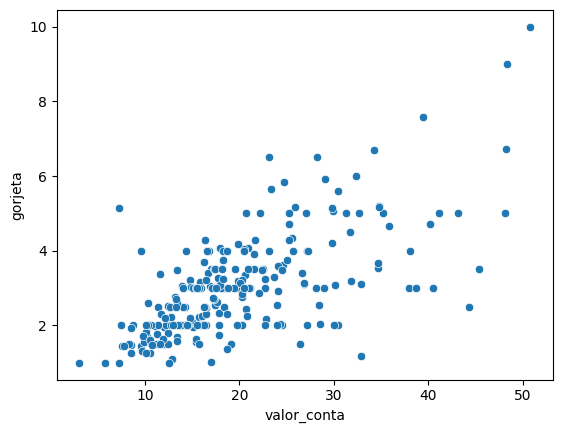

In [19]:
valor_gorjeta = sns.scatterplot(x='valor_conta', y='gorjeta', data=dados)

valor_gorjeta

#### Visualmente, o valor da gorjeta aumenta conforme o valor da conta

### Criando o campo porcentagem

In [20]:
dados.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,qtd_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [21]:
dados['porcentagem'] = (dados.gorjeta / dados.valor_conta)*100

dados

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,qtd_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.944673
1,10.34,1.66,Não,Domingo,Jantar,3,16.054159
2,21.01,3.50,Não,Domingo,Jantar,3,16.658734
3,23.68,3.31,Não,Domingo,Jantar,2,13.978041
4,24.59,3.61,Não,Domingo,Jantar,4,14.680765
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sabado,Jantar,3,20.392697
240,27.18,2.00,Sim,Sabado,Jantar,2,7.358352
241,22.67,2.00,Sim,Sabado,Jantar,2,8.822232
242,17.82,1.75,Não,Sabado,Jantar,2,9.820426


In [22]:
dados.porcentagem = dados.porcentagem.round(2)

In [23]:
dados.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,qtd_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


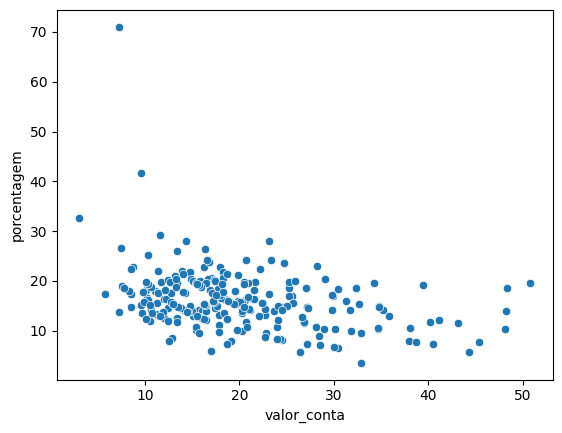

In [24]:
porcentagem_conta = sns.scatterplot(x='valor_conta', y='porcentagem', data=dados)

#### Visualmente, o valor da conta não é proporcional ao valor da gorjeta

c:\Users\Rodrigo Cruz\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


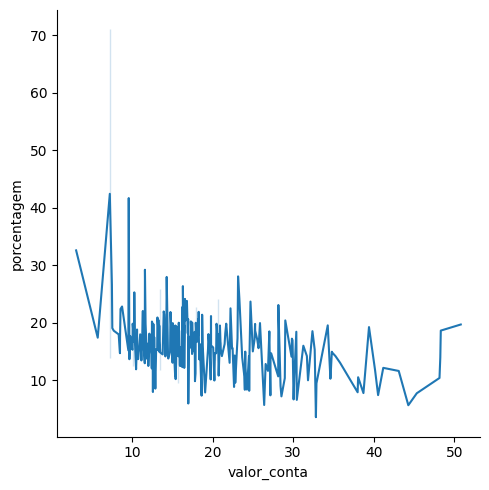

In [25]:
porcentagem_conta_linha = sns.relplot(x='valor_conta', y='porcentagem',kind='line' ,data=dados)

c:\Users\Rodrigo Cruz\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


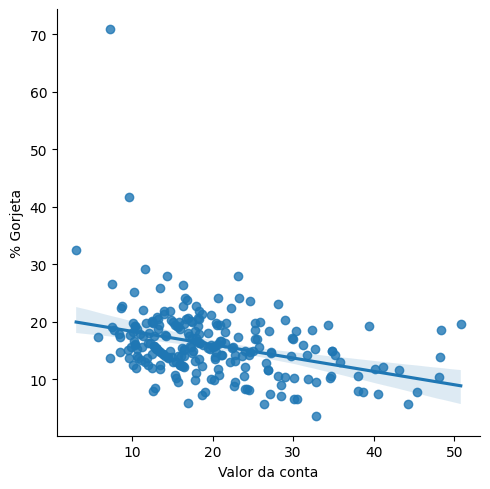

In [26]:
df_aux = sns.lmplot(x='valor_conta', y='porcentagem', data=dados)
df_aux.set(xlabel='Valor da conta', ylabel='% Gorjeta')

# Análise 2: Sobremesa

In [30]:
dados[dados.sobremesa == 'Sim'].describe().T

,count,mean,std,min,25%,50%,75%,max
valor_conta,93.0,20.756344,9.832154,3.07,13.42,17.92,26.86,50.81
gorjeta,93.0,3.008710,1.401468,1.00,2.00,3.00,3.68,10.00
qtd_pessoas,93.0,2.408602,0.810751,1.00,2.00,2.00,3.00,5.00
porcentagem,93.0,16.319140,8.511748,3.56,10.68,15.38,19.51,71.03


In [32]:
dados[dados.sobremesa == 'Não'].describe().T

,count,mean,std,min,25%,50%,75%,max
valor_conta,151.0,19.188278,8.255582,7.25,13.325,17.59,22.755,48.33
gorjeta,151.0,2.991854,1.377190,1.00,2.000,2.74,3.505,9.00
qtd_pessoas,151.0,2.668874,1.017984,1.00,2.000,2.00,3.000,6.00
porcentagem,151.0,15.932318,3.990701,5.68,13.690,15.56,18.500,29.20


C:\Users\Rodrigo Cruz\AppData\Local\Temp\ipykernel_12256\4117640174.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x='sobremesa', y='gorjeta', data=dados, palette='viridis')
c:\Users\Rodrigo Cruz\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


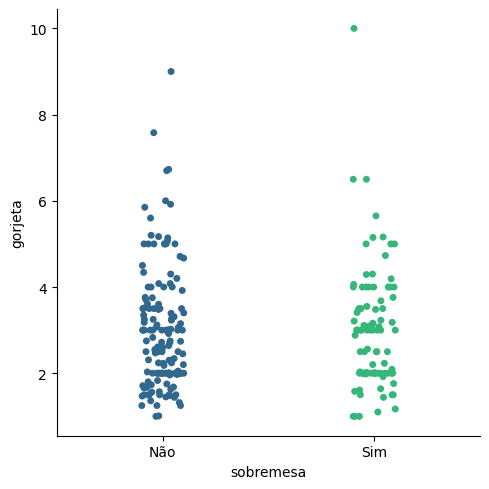

In [34]:
sns.catplot(x='sobremesa', y='gorjeta', data=dados, palette='viridis')

c:\Users\Rodrigo Cruz\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


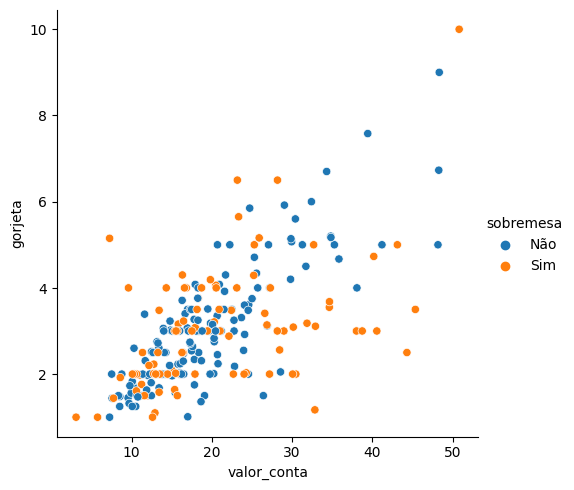

In [35]:
sns.relplot(x='valor_conta', y='gorjeta', data=dados, hue='sobremesa')

c:\Users\Rodrigo Cruz\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


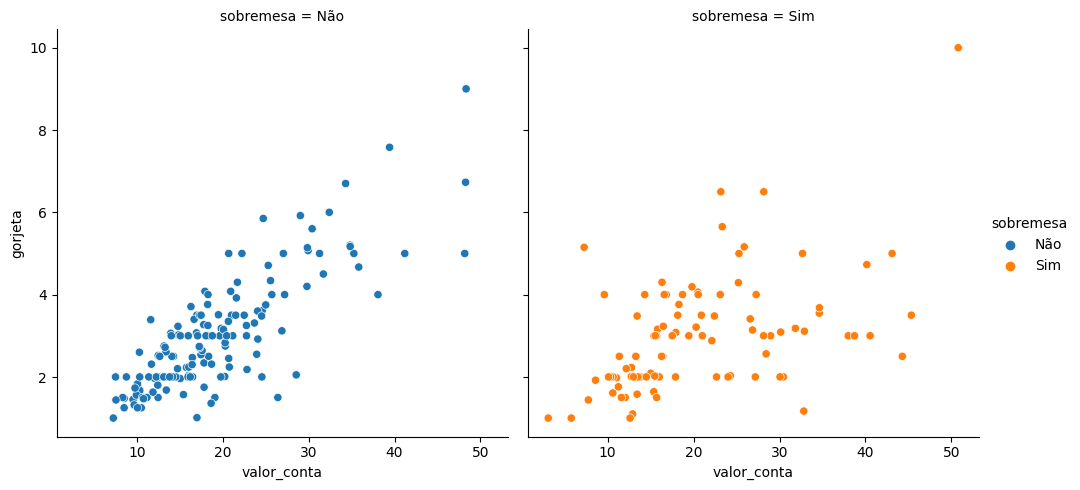

In [36]:
sns.relplot(x='valor_conta', y='gorjeta', data=dados, hue='sobremesa', col='sobremesa')

c:\Users\Rodrigo Cruz\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


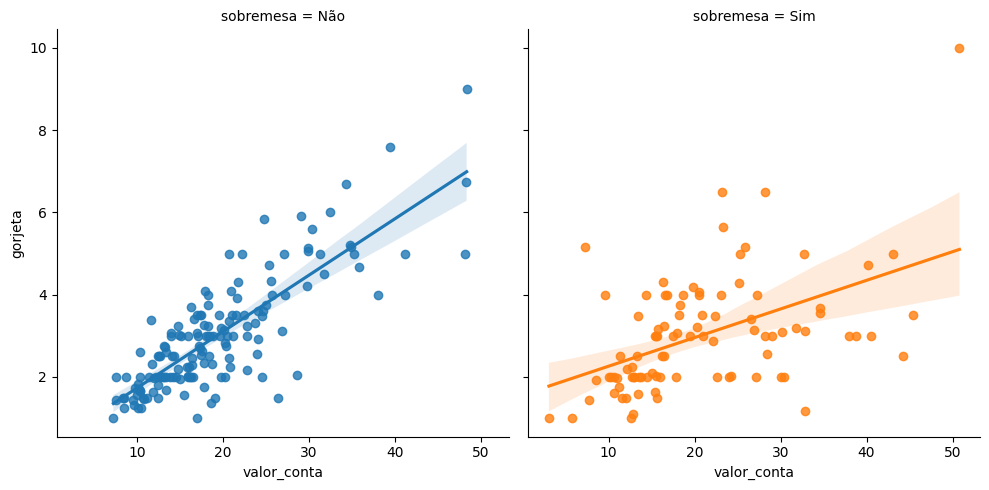

In [38]:
sns.lmplot(x='valor_conta', y='gorjeta', hue='sobremesa', col='sobremesa',data=dados)

c:\Users\Rodrigo Cruz\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


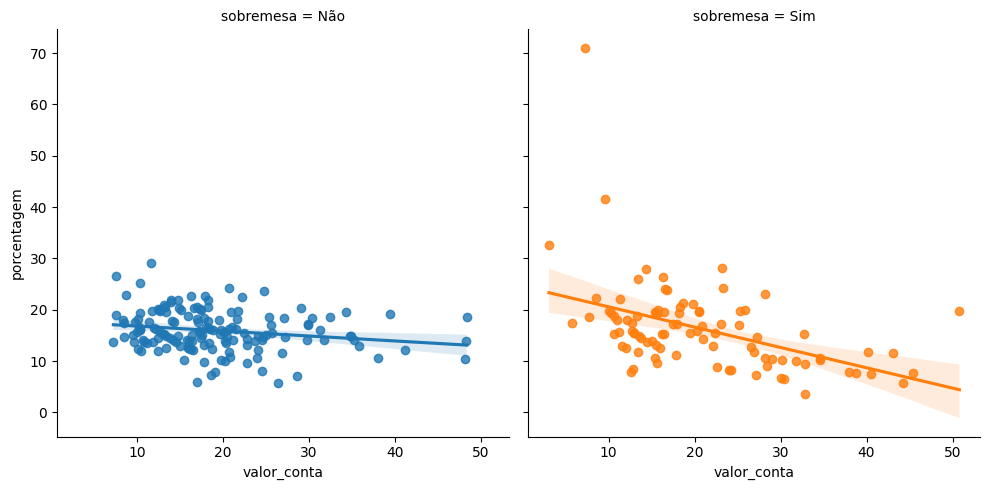

In [39]:
sns.lmplot(x='valor_conta', y='porcentagem', hue='sobremesa', col='sobremesa',data=dados)

c:\Users\Rodrigo Cruz\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


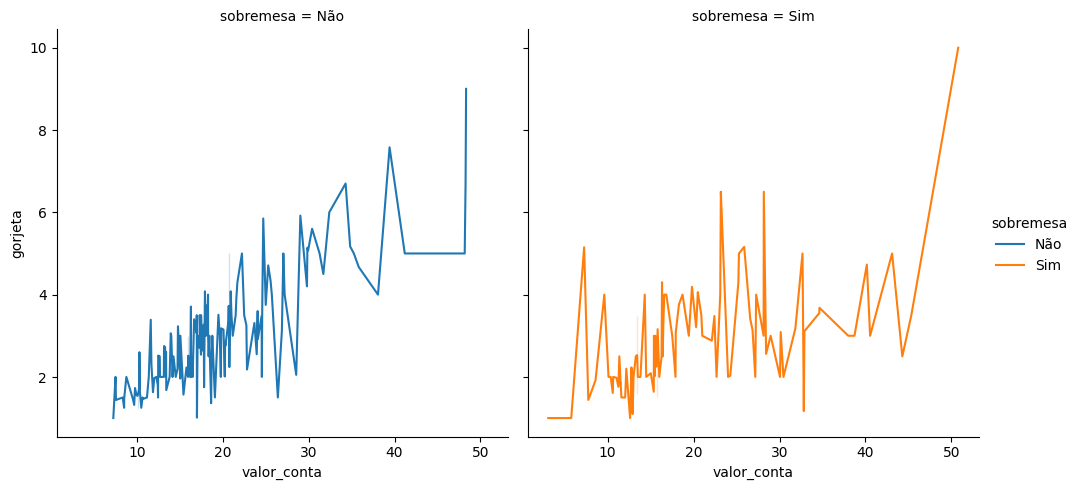

In [41]:
sns.relplot(x='valor_conta', y='gorjeta', data=dados, hue='sobremesa', col='sobremesa', kind='line')

c:\Users\Rodrigo Cruz\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


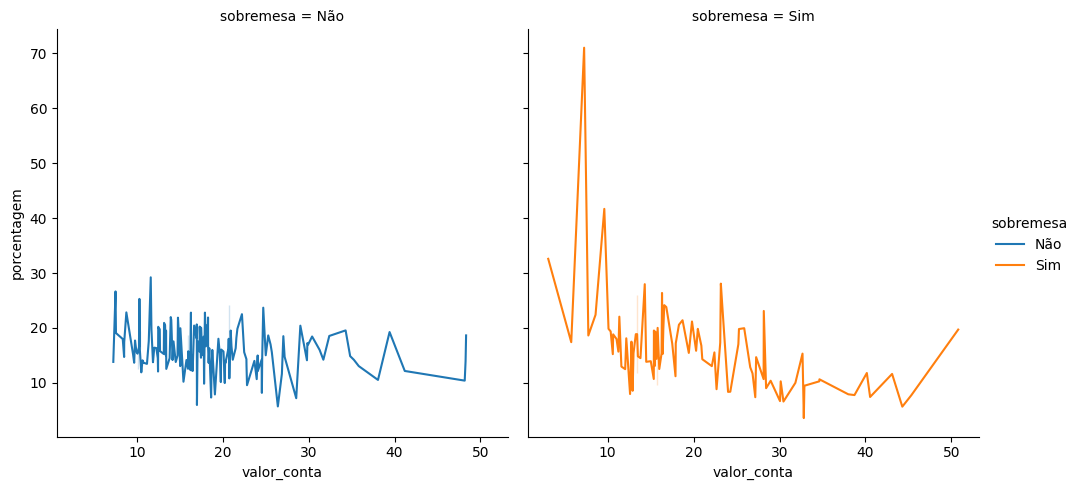

In [42]:
sns.relplot(x='valor_conta', y='porcentagem', data=dados, hue='sobremesa', col='sobremesa', kind='line')

### Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram gorjeta

### Teste de Hipotese #1

**H<sup>null<sup>**

**A distribuição de taxa de gorjeta é a mesma nos dois grupos**

**H<sup>alt<sup>**

**A distribuição de taxa de gorjeta não é a mesma nos dois grupos**


In [44]:
# !pip install scipy


     ---------------------------------------- 44.0/44.0 MB 6.1 MB/s eta 0:00:00


In [45]:
from scipy.stats import ranksums

In [46]:
sobremesa = dados.query("sobremesa == 'Sim'").porcentagem

In [49]:
sem_sobremesa = dados.query("sobremesa == 'Não'").porcentagem

In [80]:
r = ranksums(sobremesa, sem_sobremesa)
r


RanksumsResult(statistic=-0.5845504113520769, pvalue=0.558850059321255)

In [53]:
print(f'O valor de p_value é {r.pvalue}')

O valor de p_value é 0.558850059321255


**A distribuição da taxa de gorjeta é a mesma nos dois grupos**

# Analise 3 -  Dia da Semana

In [57]:
dados.dia_semana.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

c:\Users\Rodrigo Cruz\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


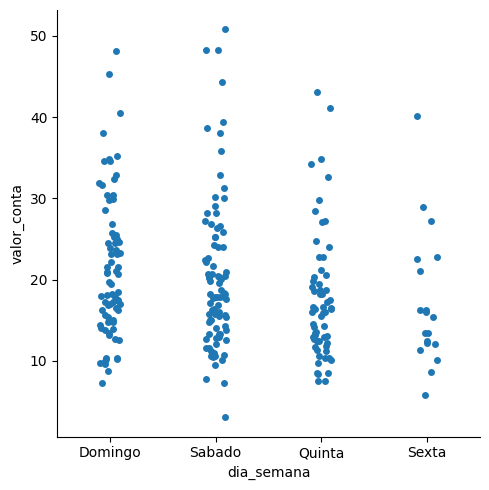

In [58]:
# Qual dia da semana, as pessoas tem gastado mais

sns.catplot(x='dia_semana', y='valor_conta', data=dados)

c:\Users\Rodrigo Cruz\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


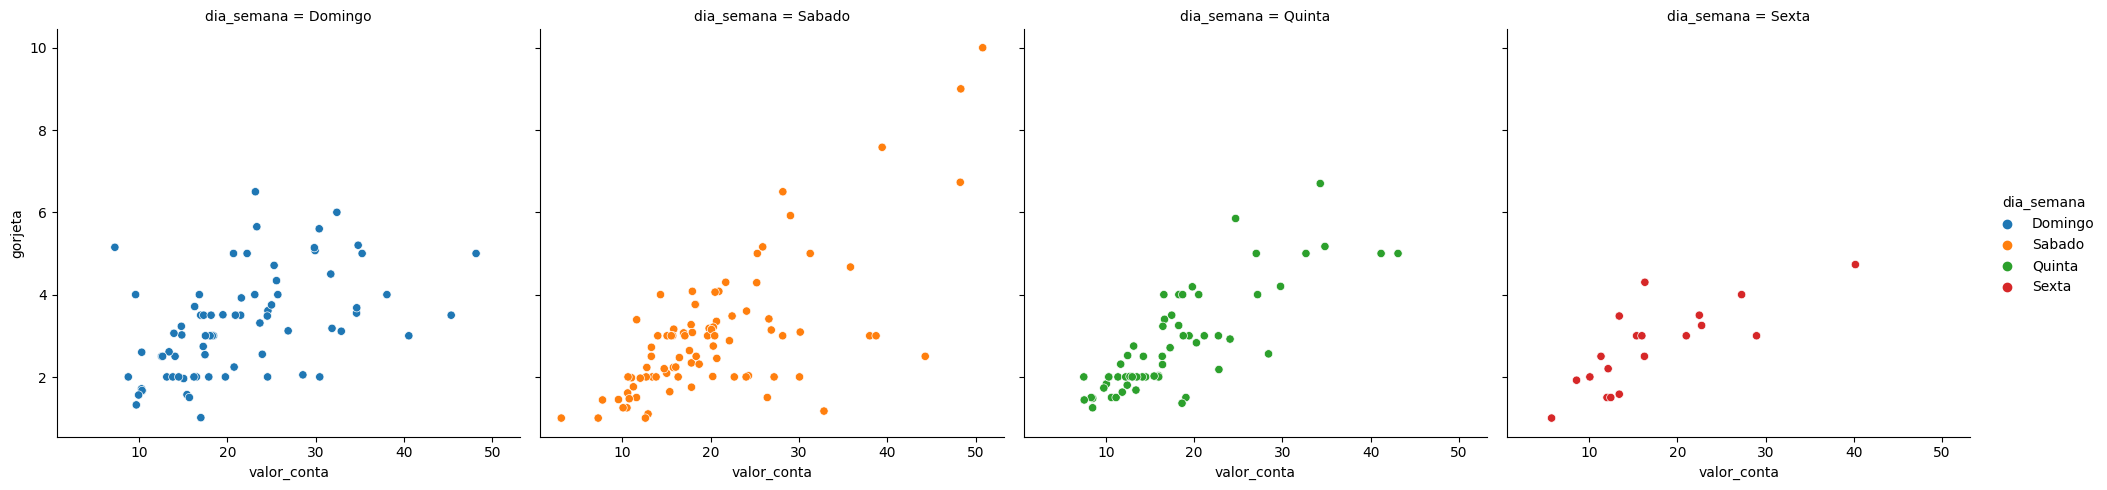

In [59]:
sns.relplot(x='valor_conta', y='gorjeta', data=dados, hue='dia_semana', col='dia_semana')

c:\Users\Rodrigo Cruz\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


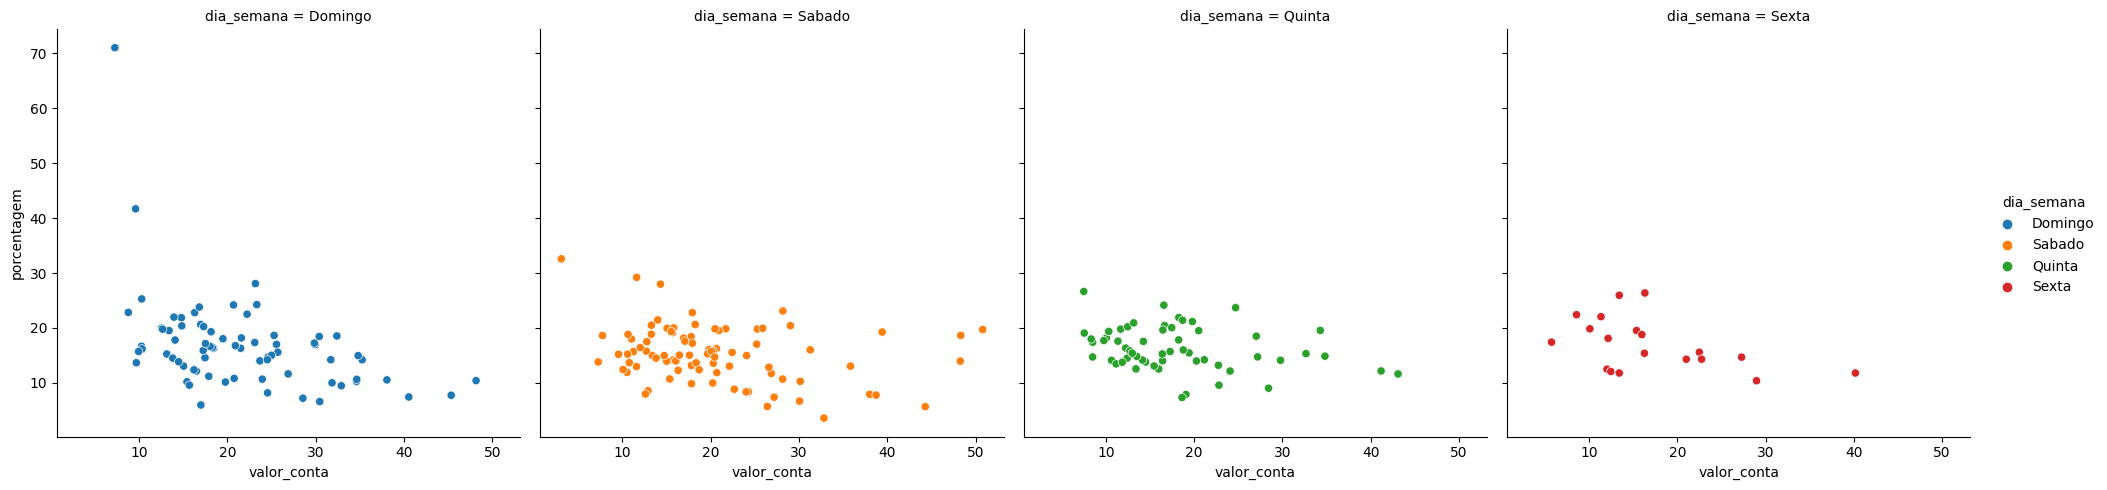

In [60]:
sns.relplot(x='valor_conta', y='porcentagem',data=dados, hue='dia_semana', col='dia_semana')

c:\Users\Rodrigo Cruz\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


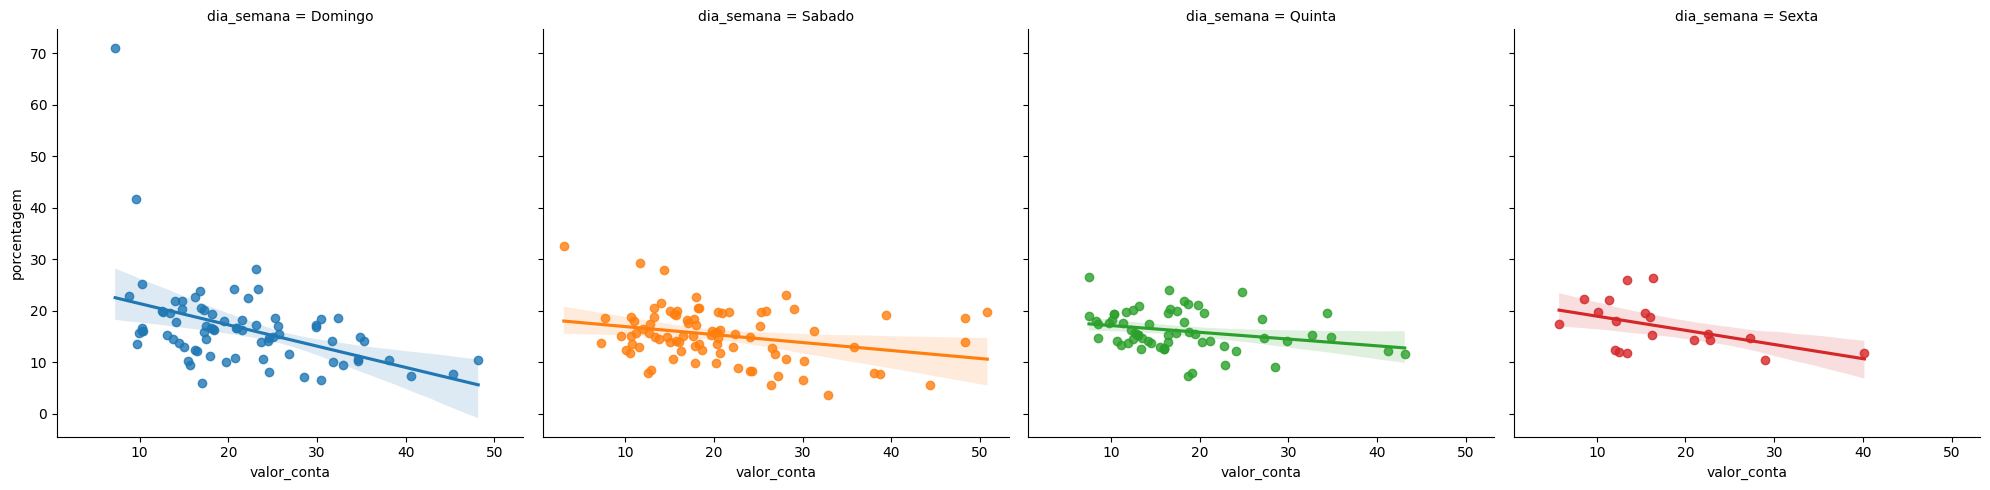

In [61]:
sns.lmplot(x='valor_conta', y='porcentagem',data=dados, hue='dia_semana', col='dia_semana')

In [63]:
# Analise descritiva
media_geral_gorjeta = dados.gorjeta.mean()

print(f'Media geral das gorjetas: {media_geral_gorjeta}')

Media geral das gorjetas: 2.99827868852459


In [70]:
dados.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora_dia,qtd_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


In [71]:
col = ['valor_conta', 'gorjeta', 'porcentagem', 'dia_semana']
dados.loc[:,col].groupby(['dia_semana']).mean()

,valor_conta,gorjeta,porcentagem
dia_semana,,,
Domingo,21.410000,3.255132,16.689605
Quinta,17.682742,2.771452,16.126452
Sabado,20.441379,2.993103,15.314598
Sexta,17.151579,2.734737,16.991579


In [67]:
dados.dia_semana.value_counts()

dia_semana
Sabado     87
Domingo    76
Quinta     62
Sexta      19
Name: count, dtype: int64

### Teste de Hipotese #2

**H<sup>null<sup>**

**A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt<sup>**

**A distribuição do valor da conta não é igual no sábado e no domingo**

In [75]:
valor_conta_domingo = dados.query("dia_semana == 'Domingo'").valor_conta

In [74]:
valor_conta_sabado = dados.query("dia_semana == 'Sabado'").valor_conta

In [76]:
r = ranksums(valor_conta_domingo, valor_conta_sabado)

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)

In [77]:
print(f'O valor de p_value é {r.pvalue}')

O valor de p_value é 0.558850059321255


**H<sup>null<sup>**

**A distribuição do valor da conta é igual no sábado e no domingo**

# Analise 4: Hora do dia